In [2]:
# Exploratory Data Analysis on Titanic Dataset

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

# 2. Load Dataset
df = pd.read_csv('train.csv')

# Preview data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and missing values
df.info()

# Statistical summary
df.describe()


Dataset contains 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are missing values in 'Age', 'Cabin', and 'Embarked' columns

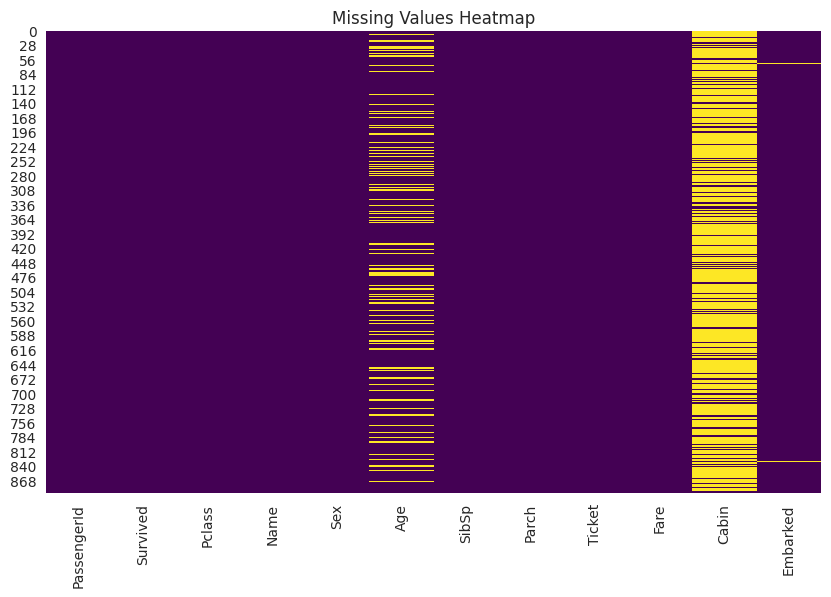

In [4]:
# Missing Values Visualization
# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


'Cabin' has a lot of missing data (~77%), 'Age' and 'Embarked' have few missing values.


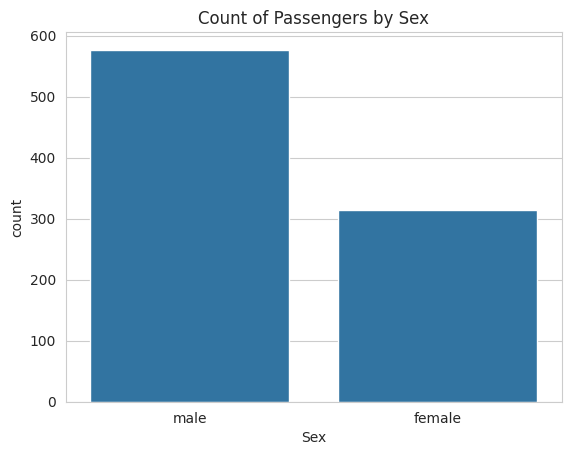

In [5]:
#Univariate Analysis
#Categorical Columns
# Gender count
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Sex')
plt.show()


More males (577) than females (314) were on board.

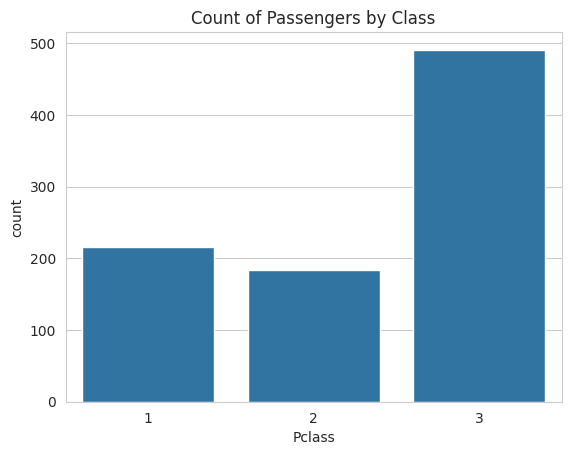

In [6]:
# Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Class')
plt.show()


Most passengers were in 3rd class.

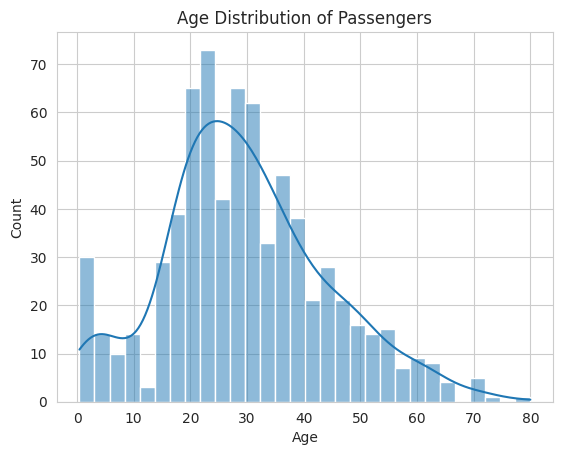

In [7]:
#Numerical Columns
# Age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


Most passengers are between 20 and 40 years old.

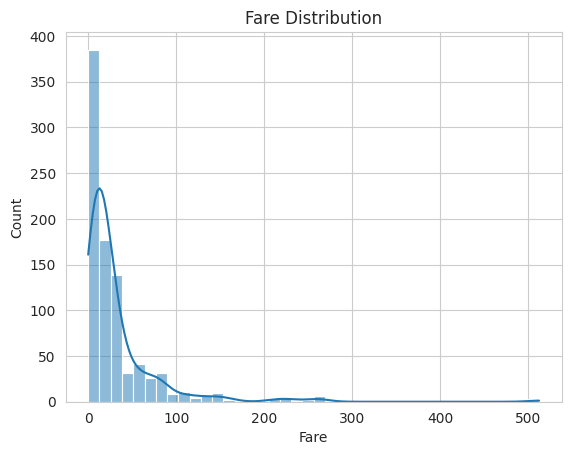

In [9]:
# Fare distribution
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()


Fare is right-skewed; a few passengers paid very high fares.

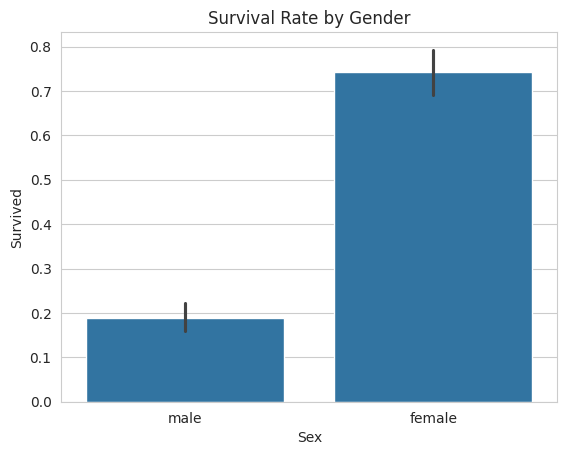

In [10]:
#Bivariate Analysis
#Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


Females had a much higher survival rate than males.

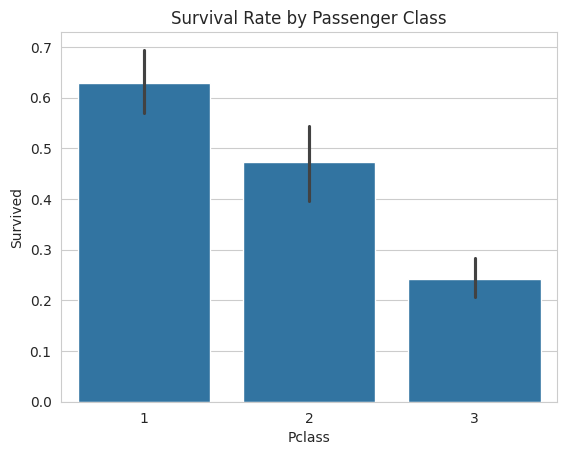

In [11]:
#Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


1st class passengers had a much higher survival rate.

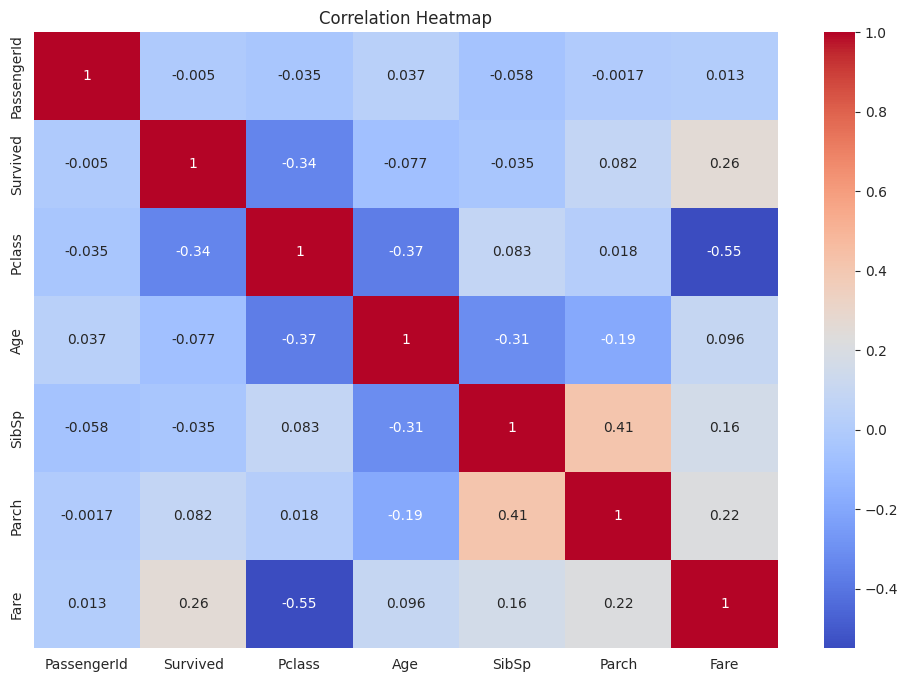

In [14]:
#Correlation Heatmap
#Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Fare is positively correlated with survival; Pclass negatively correlated.

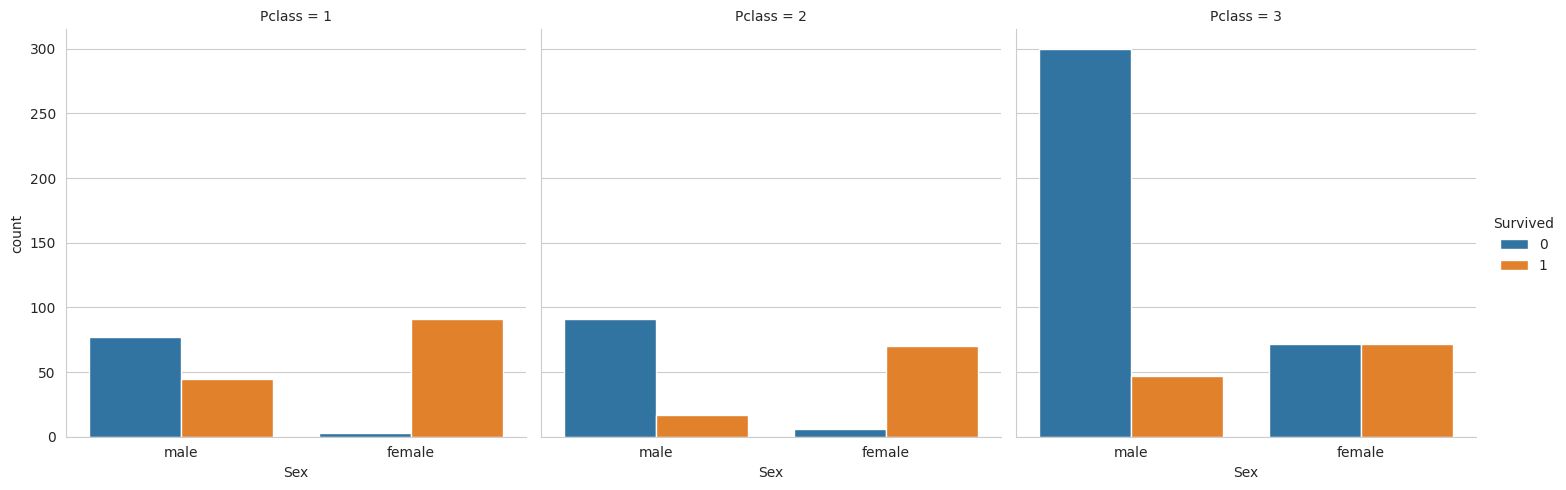

In [15]:
#Multivariate Analysis
#Survival by Sex and Pclass
sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=df)
plt.show()

In every class, females had a higher survival rate, especially in 1st class

In [16]:
#Handling Missing Values
#Fill Missing Age
# Fill missing Age based on Sex and Pclass median
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Drop 'Cabin' (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify
df.isnull().sum()


<ipython-input-16-4a0f6bc7b3b2>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


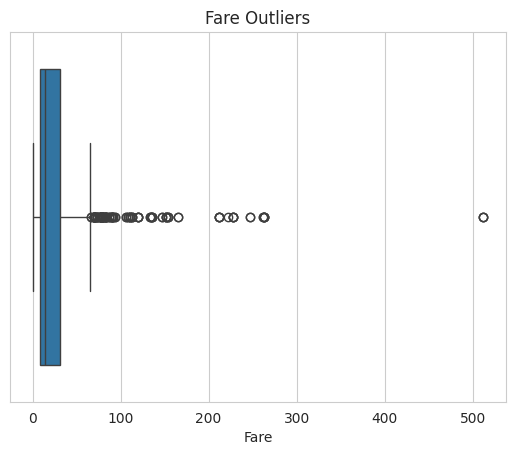

In [17]:
#Outlier Detection
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()


Some passengers paid extremely high fares (> $200).

In [18]:
#IQR Outlier Removal
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]


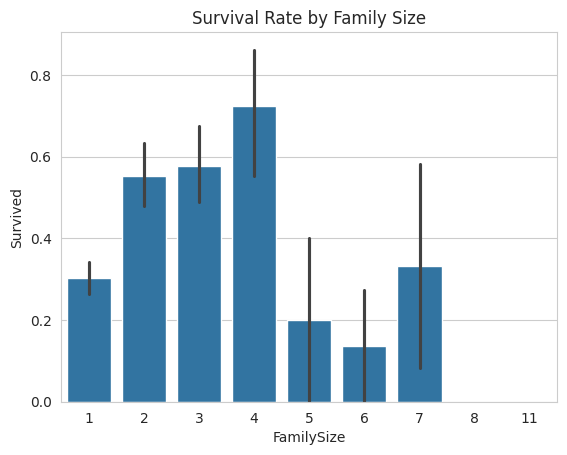

In [19]:
#Feature Engineering
#Create "FamilySize"
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Visualize Family Size vs Survival
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


Passengers with small families (2-4) had better survival chances.

In [20]:
#Chi-Square Test for Categorical Features
from scipy.stats import chi2_contingency

# Sex vs Survived
table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square Test P-Value between Sex and Survived: {p}")


Chi-square Test P-Value between Sex and Survived: 1.1973570627755645e-58


P-value < 0.05 → Sex and survival are statistically dependent.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


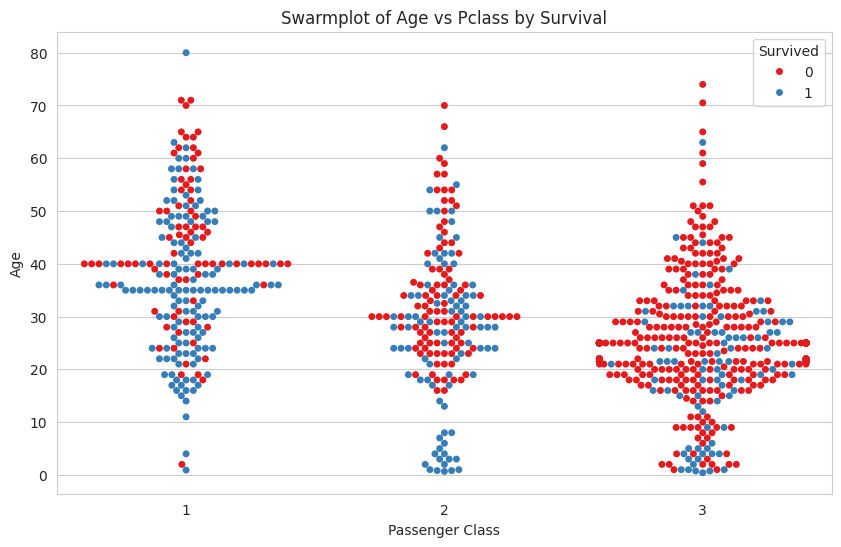

In [21]:
# Swarmplot: Pclass vs Age colored by Survival

plt.figure(figsize=(10,6))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df, palette='Set1')
plt.title('Swarmplot of Age vs Pclass by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


Survived (0 = Died, 1 = Survived)
- Younger passengers had higher survival rates, especially in 1st and 2nd class.
- In 3rd class, many young passengers died compared to 1st/2nd class.
- 1st class passengers were generally older but had better survival.

